# Get Data

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Change Notebook Settings
pd.set_option('display.max_rows', 120)

In [3]:
data = pd.read_csv('fifa21_training.csv')

#Removing Rows with Inactive Players
data.dropna(inplace=True)

#Drop Nationality, Club, and Name Columns
data = data.drop(['Nationality', 'Club', 'Name'], axis = 1)
    
#Drop Players where GK is Default Position
data.drop(data.loc[data['Default Position']=='GK'].index, inplace=True)

#Remove Goalkeepers
data = data.drop(['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis =1)

data.head()
#OVA column is our target

,Age,Default Position,Height,Weight,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,Total Stats,Base Stats,W/F,SM,AW,DW,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,26,CM,"5'9""",161lbs,€525K,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,64
1,30,ST,"6'0""",159lbs,€8.5M,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,77
2,33,CAM,"5'4""",134lbs,€9M,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,80
3,22,CDM,"5'10""",152lbs,€275K,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,23,CDM,"5'11""",150lbs,€725K,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,65


In [4]:
#Stripping Currency and Value Denominators
data['Value'] = [x.strip("€") for x in data['Value']]
data['Value'] = [x.strip("M") for x in data['Value']]
data['Value'] = [x.strip("K") for x in data['Value']]
data['Value'] = pd.to_numeric(data['Value'])

# Clean Data

In [5]:
#Define a Function for Cleaning 
def clean(x):
    
    data = x
    
    #Stripping " from the Height row so that it can be split on '
    data['Height'] = data['Height'].str.strip("\"")
    
    #Creating a New Dataframe with the split columns
    new = data['Height'].str.split("\'", n = 1, expand = True)
    
    #Define Foot > Inches Conversion
    def ftin(x):
        return int (x)*12
    
    #Create a New Column in the Main DF with the converted Feet
    data['Inches2'] = list(map(ftin, new[0]))
    
    #Create a New Column in the Main DF with split inches
    data["Inches"]= new[1]
    
    # Sum the two and replace values in Height
    data['Height'] = data[['Inches', 'Inches2']].sum(axis = 1)
    
    #Define Inches to CM Conversion
    def toCM(x):
        return float (x)*2.54
    
    #Convert Corrected Heights into CM
    data['Height'] = list(map(toCM, data['Height']))
    
    #Drop Columns used for Manipulation
    data.drop(['Inches', 'Inches2'], axis=1, inplace=True)
    
    #Create Value Multiply Function

    def valueMultiply(x):
        if (x) >= 100:
            return int(x)*1000
        else:
            return int(x)*1000000
            
    #Apply the Function to the Value Column

    data['Value'] = list(map(valueMultiply, data['Value']))
    
    #Clean Weight Function - Jessie
    
    def cleanWeight(x):
        data = x
        data['Weight'].apply(lambda x: x.strip("lbs"))
        data['Weight'] = [x.strip("lbs") for x in data['Weight']]
    
    cleanWeight(data)
        
    def convert (x):
            x = int(x)/2.2046
            return int(x)
    
    data['Weight'] = list(map(convert, data['Weight']))
    
    return data  

    
    #reindex DataFrame
    data = data.reset_index()
    data = data.drop(['index'], axis=1)
    return data

In [6]:
clean(data)
data['Default Position'].unique()

array(['CM', 'ST', 'CAM', 'CDM', 'LM', 'RB', 'CB', 'RM', 'LB', 'RW',
       'LWB', 'LW', 'RWB', 'CF'], dtype=object)

In [7]:
data.head()

,Age,Default Position,Height,Weight,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,Total Stats,Base Stats,W/F,SM,AW,DW,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,26,CM,152.40,73,525000,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,64
1,30,ST,182.88,72,8000000,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,77
2,33,CAM,152.40,60,9000000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,80
3,22,CDM,152.40,68,275000,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,23,CDM,152.40,68,725000,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,65


In [8]:
data.shape

(12104, 55)

In [9]:
#cleaning functions for star ratings
def cleanStar (x):
    if x in ['4 ★','4★']:
        x = '4 Star'
    elif x in ['5 ★','5★']:
        x = '5 Star'
    elif x in ['3 ★','3★']:
        x = '3 Star'
    elif x in ['2 ★','2★']:
        x = '2 Star'
    elif x in ['1 ★','1★']:
        x = '1 Star'
    return x

In [10]:
#apply clean functions
data['SM'] = list(map(cleanStar, data['SM']))
data['IR'] = list(map(cleanStar, data['IR']))
data['W/F'] = list(map(cleanStar, data['W/F']))

In [11]:
data.shape

(12104, 55)

In [12]:
#If needed, standardize header names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols
data.columns = [e.lower().replace(' ','_')for e in data.columns]
data.head()

,age,default_position,height,weight,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,total_stats,base_stats,w/f,sm,aw,dw,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,152.40,73,525000,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,1682,357,4 Star,2 Star,High,Medium,1 Star,69,51,63,63,51,60,64
1,30,ST,182.88,72,8000000,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,1961,412,3 Star,4 Star,High,Low,2 Star,83,75,68,82,33,71,77
2,33,CAM,152.40,60,9000000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,1925,404,4 Star,4 Star,High,Medium,2 Star,80,77,78,86,27,56,80
3,22,CDM,152.40,68,275000,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,1527,329,2 Star,2 Star,Medium,Medium,1 Star,57,44,54,57,57,60,59
4,23,CDM,152.40,68,725000,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,1664,360,2 Star,3 Star,Low,Medium,1 Star,66,44,60,64,60,66,65


In [13]:
data = data.reset_index()
data = data.drop(['index'], axis=1)

In [14]:
data.shape

(12104, 55)

In [15]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [16]:
X_num.head()

,age,height,weight,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,total_stats,base_stats,pac,sho,pas,dri,def,phy,ova
0,26,152.40,73,525000,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,1682,357,69,51,63,63,51,60,64
1,30,182.88,72,8000000,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,1961,412,83,75,68,82,33,71,77
2,33,152.40,60,9000000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,1925,404,80,77,78,86,27,56,80
3,22,152.40,68,275000,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,1527,329,57,44,54,57,57,60,59
4,23,152.40,68,725000,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,1664,360,66,44,60,64,60,66,65


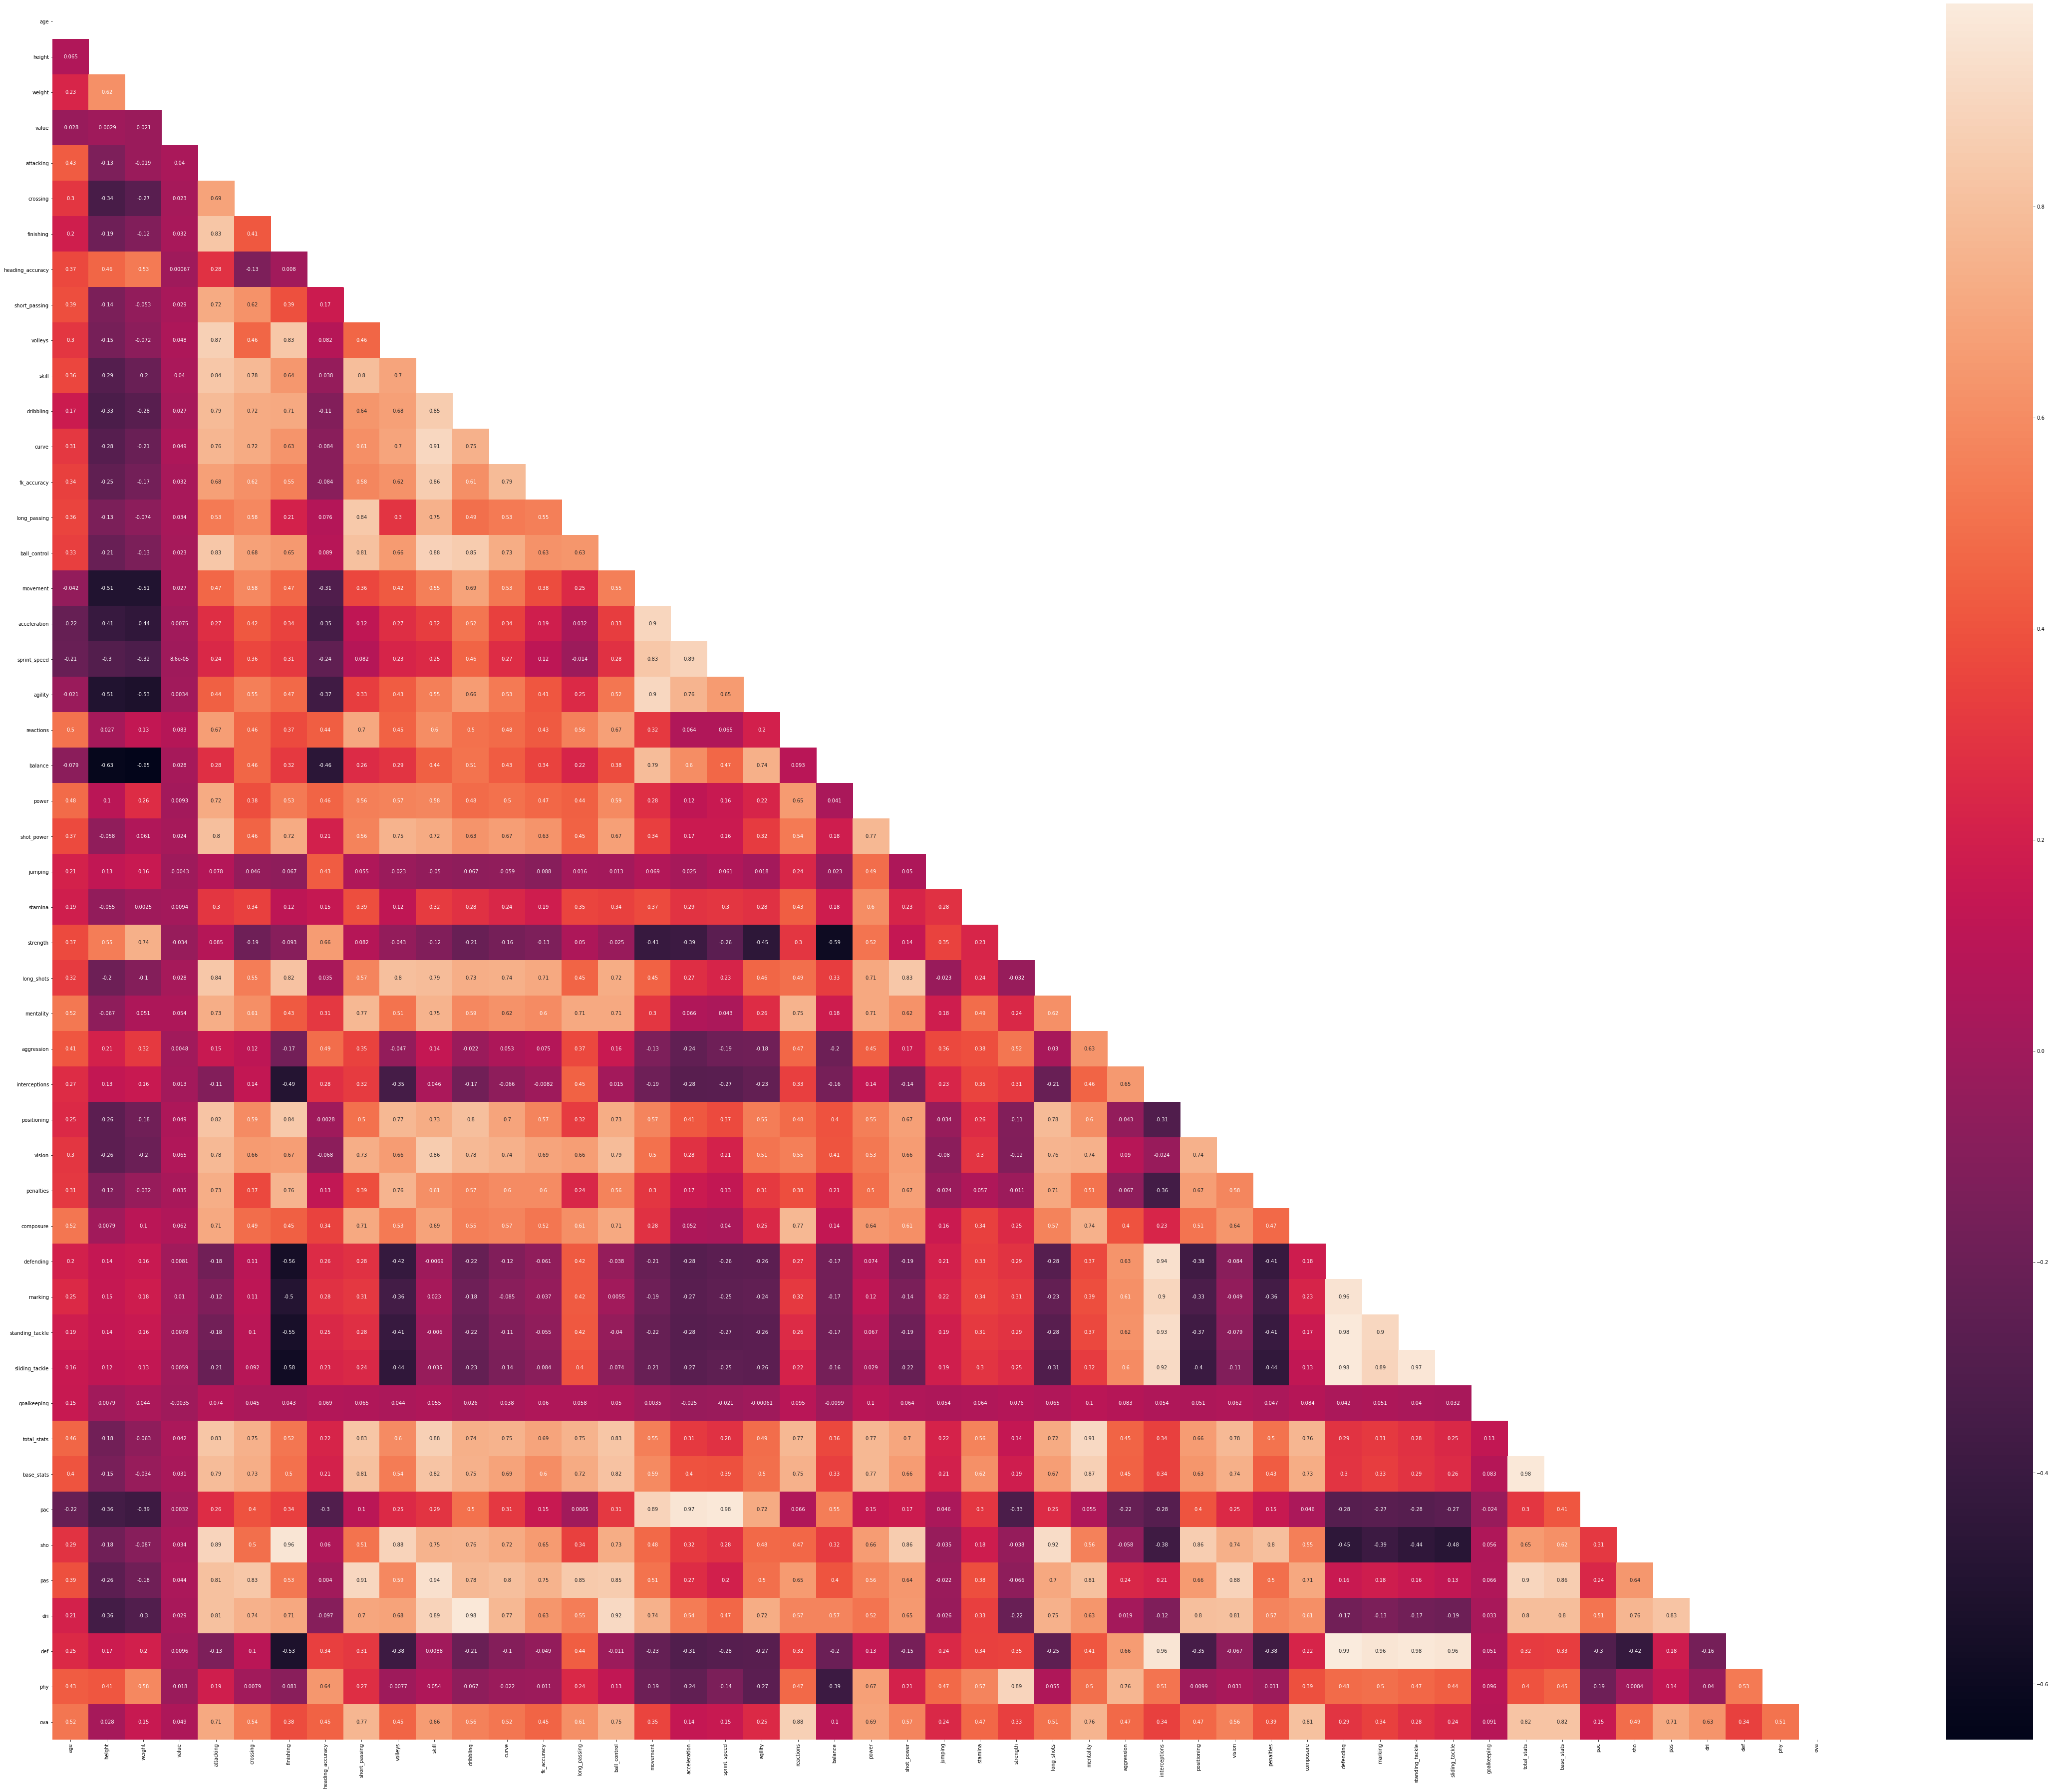

In [17]:
#Create the Correlations Matrix for OVA. Double Click to Zoom

correlations_matrix = X_num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(80, 64))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [18]:
X_cat.head()

,default_position,w/f,sm,aw,dw,ir
0,CM,4 Star,2 Star,High,Medium,1 Star
1,ST,3 Star,4 Star,High,Low,2 Star
2,CAM,4 Star,4 Star,High,Medium,2 Star
3,CDM,2 Star,2 Star,Medium,Medium,1 Star
4,CDM,2 Star,3 Star,Low,Medium,1 Star


In [19]:
Y = X_num['ova']
X_num = X_num.drop(['ova'], axis=1)

In [20]:
X_num.head()

,age,height,weight,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,total_stats,base_stats,pac,sho,pas,dri,def,phy
0,26,152.40,73,525000,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,1682,357,69,51,63,63,51,60
1,30,182.88,72,8000000,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,1961,412,83,75,68,82,33,71
2,33,152.40,60,9000000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,1925,404,80,77,78,86,27,56
3,22,152.40,68,275000,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,1527,329,57,44,54,57,57,60
4,23,152.40,68,725000,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,1664,360,66,44,60,64,60,66


In [21]:
#Create normalized dataframe

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(12104, 48)


In [22]:
#Create standardized dataframe

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)

(12104, 48)


In [23]:
#Encoding the Dummies using OneHot
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded.shape

(12104, 28)

In [24]:
#Creating the Full X Dataframe for Initial Testing
X = np.concatenate((x_normalized, encoded), axis=1)
pd.DataFrame(X).shape


(12104, 76)

In [25]:
Y.shape

(12104,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [27]:
#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print

print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)


Test Results:


MSE: 14.679155217867262


RMSE: 3.831338567376585


R2: 0.6783367501393713


Adj. R2: 0.6714601237007194



In [28]:
#Customize X_num to the query
#Testing with the 6 'Card Stats'
X_numTest1 = X_num[['pac','sho','pas','dri','def','phy']]

#Create normalized dataframe
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_numTest1)
x_normalized = transformer.transform(X_numTest1)
print(x_normalized.shape)

#Set X to x_normalized without concatenating
X = x_normalized

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)

(12104, 6)

Test Results:


MSE: 34.332980947982634


RMSE: 5.859435207251859


R2: 0.24766391081627404


Adj. R2: 0.24641866487555608



In [29]:
#Customize X_num to the query
#Testing with stats with measures with values >100
X_numTest2 = X_num[['attacking','skill','movement','power','mentality','defending']]

#Create normalized dataframe
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_numTest2)
x_normalized = transformer.transform(X_numTest2)
print(x_normalized.shape)

#Set X to x_normalized without concatenating
X = x_normalized

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)

(12104, 6)

Test Results:


MSE: 32.64734515497867


RMSE: 5.7137855363129155


R2: 0.2846011241103392


Adj. R2: 0.283417015626108



In [30]:
#Customize X_num to the query
#Testing with stats with measures with values >100
X_numTest3 = X_num[['reactions', 'base_stats', 'pas', 'dri', 'total_stats', 'value']]

#Create normalized dataframe

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_numTest3)
x_normalized = transformer.transform(X_numTest3)
print(x_normalized.shape)

#Set X to x_normalized without concatenating
X = x_normalized

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)

(12104, 6)

Test Results:


MSE: 22.147924358229677


RMSE: 4.706158131451777


R2: 0.5153273623796122


Adj. R2: 0.5147259071933201



In [31]:
#Customize X_num to the query
X_num = data.select_dtypes(include = np.number)
X_numTest1 = X_num[['ova', 'reactions', 'base_stats', 'pas', 'dri', 'total_stats', 'value']]

#Reset Y
Y = X_num['ova']
X_num = X_num.drop(['ova'], axis=1)

#Create normalized dataframe
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_numTest1)
x_normalized = transformer.transform(X_numTest1)
print(x_normalized.shape)

#Set X to x_normalized without concatenating
X = x_normalized

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)

(12104, 7)

Test Results:


MSE: 22.171163245514446


RMSE: 4.708626471224326


R2: 0.5148188157269555


Adj. R2: 0.5141162364365313



In [32]:
##Resetting Y To a New Defender-less Dataframe
X_numDummy = data.select_dtypes(include = np.number)

#Dropping Defensive Default Positions
X_numDummy.drop(data.loc[data['default_position']=='LB'].index, inplace=True)
X_numDummy.drop(data.loc[data['default_position']=='RB'].index, inplace=True)
X_numDummy.drop(data.loc[data['default_position']=='LWB'].index, inplace=True)
X_numDummy.drop(data.loc[data['default_position']=='RWB'].index, inplace=True)
X_numDummy.drop(data.loc[data['default_position']=='CB'].index, inplace=True)
X_numDummy = X_numDummy.drop(['defending', 'standing_tackle', 'sliding_tackle'], axis =1)
Y = X_numDummy['ova']
X_numDummy = X_numDummy.drop(['ova'], axis=1)
##

X_numDummy.head()
Y.head()

#Testing with stats with measures with values >100, less defending
X_numDummy2 = X_numDummy[['total_stats','skill','movement','power','mentality']]

#Create normalized dataframe
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_numDummy2)
x_normalized = transformer.transform(X_numDummy2)
print(x_normalized.shape)

#Set X to x_normalized without concatenating
X = x_normalized

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)

(7801, 5)

Test Results:


MSE: 32.93321149031137


RMSE: 5.738746508629857


R2: 0.29052412704251607


Adj. R2: 0.2893853214679455



In [33]:
X_cat.head()

,default_position,w/f,sm,aw,dw,ir
0,CM,4 Star,2 Star,High,Medium,1 Star
1,ST,3 Star,4 Star,High,Low,2 Star
2,CAM,4 Star,4 Star,High,Medium,2 Star
3,CDM,2 Star,2 Star,Medium,Medium,1 Star
4,CDM,2 Star,3 Star,Low,Medium,1 Star


In [34]:
#Resetting Variables
X_num = data.select_dtypes(include = np.number)
Y = X_num['ova']
X_num = X_num.drop(['ova'], axis=1)

#Creating Test Sets
X_catDummy = X_cat[['aw','dw']]
X_numDummy3 = X_num[['age', 'value', 'total_stats', ]]


#Encoding the Dummies using OneHot
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_catDummy)
encoded = encoder.transform(X_catDummy).toarray()


#Create normalized dataframe
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_numDummy3)
x_normalized = transformer.transform(X_numDummy3)
print(x_normalized.shape)

#
X = np.concatenate((x_normalized, encoded), axis=1)
pd.DataFrame(X).shape

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)

(12104, 3)

Test Results:


MSE: 21.463042324590557


RMSE: 4.632822285021362


R2: 0.5303149330581867


Adj. R2: 0.5296347933253376



In [35]:
#Resetting Variables
X_num = data.select_dtypes(include = np.number)
Y = X_num['ova']
X_num = X_num.drop(['ova'], axis=1)

#Creating Test Sets
X_catDummy = X_cat[['aw','dw']]


#Encoding the Dummies using OneHot
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_catDummy)
encoded = encoder.transform(X_catDummy).toarray()


#Create normalized dataframe
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

#
X = np.concatenate((x_normalized, encoded), axis=1)
pd.DataFrame(X).shape

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)

(12104, 48)

Test Results:


MSE: 20.91934280186645


RMSE: 4.5737668066776695


R2: 0.5422129455982974


Adj. R2: 0.5372421945377652



In [36]:
X_num = data.select_dtypes(include = np.number)

Y = X_num['ova']
X_num = X_num.drop(['ova'], axis=1)

#Normalized, Short Passing, Ball Control, Reactions, Mentality, Composure, Total Stats, Base States
X_catDummy = X_cat[['aw','dw', 'w/f', 'sm']]
X_numDummy = X_num[['short_passing','ball_control','reactions','mentality','composure','total_stats','base_stats']]

#Encoding the Dummies using OneHot
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_catDummy)
encoded = encoder.transform(X_catDummy).toarray()


#Create normalized dataframe
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_numDummy)
x_normalized = transformer.transform(X_numDummy)
print(x_normalized.shape)

#
X = np.concatenate((x_normalized, encoded), axis=1)
pd.DataFrame(X).shape

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)

(12104, 7)

Test Results:


MSE: 23.99603190154785


RMSE: 4.898574476472502


R2: 0.47488442320669955


Adj. R2: 0.47292463046726774



In [37]:
X_num = data.select_dtypes(include = np.number)

Y = X_num['ova']
X_num = X_num.drop(['ova'], axis=1)

#Normalized, Short Passing, Ball Control, Reactions, Mentality, Composure, Total Stats, Base States
X_numDummy = X_num[['reactions', 'base_stats', 'pas', 'dri', 'total_stats', 'value']]

#Encoding the Dummies using OneHot
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_catDummy)
encoded = encoder.transform(X_catDummy).toarray()

#Create standardized
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_numDummy)
x_standardized = transformer.transform(X_numDummy)

#
X = np.concatenate((x_standardized, encoded), axis=1)
pd.DataFrame(X).shape

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)



Test Results:


MSE: 6.9790327027308185


RMSE: 2.641785892673897


R2: 0.8416804306131954


Adj. R2: 0.8411225050991872



In [38]:
#Test 1.2, using standardized dataframe
#Categorical Enconding Notes - Jessie
#One hote enconding: Default_position - 14 values
#Label encoding: 
    # star ratings- (1-5 stars) w/f (1-5), sm (1-4), ir (1-4), 
    # High Med, Low: aw, dw
ohe_data = X_cat.filter(items=['default_position'])
le_data = X_cat.filter(items=['w/f','sm','ir','aw','dw'])


#One Hot Enconding
pd.get_dummies(ohe_data)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(ohe_data)

#Create standardized
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)

# encoder.categories
ohe_encoded = encoder.transform(ohe_data).toarray()
type(ohe_encoded)
pd.DataFrame(ohe_encoded)
pd.concat([pd.DataFrame(x_standardized), pd.DataFrame(ohe_encoded)],axis=1)
X = np.concatenate((x_standardized, ohe_encoded), axis=1)
#pd.DataFrame(X).head()

#Label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le_data['w/f']=le.fit_transform(le_data['w/f'])
le_data['sm']=le.fit_transform(le_data['sm'])
le_data['ir']=le.fit_transform(le_data['ir'])
le_data['aw']=le.fit_transform(le_data['aw'])
le_data['dw']=le.fit_transform(le_data['dw'])

#Begin combining to normalized set
type(le)
pd.DataFrame(le_data)
pd.concat([pd.DataFrame(x_standardized), pd.DataFrame(le_data)],axis=1)
X = np.concatenate((x_standardized, le_data), axis=1)
pd.DataFrame(X)

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)


Test Results:


MSE: 4.6469163746227675


RMSE: 2.155670748194809


R2: 0.8981724628763139


Adj. R2: 0.8966641175807423



In [39]:
X_num = data.select_dtypes(include = np.number)
Y = X_num['ova']
X_num = X_num.drop(['ova'], axis=1)

#Normalized, Short Passing, Ball Control, Reactions, Mentality, Composure, Total Stats, Base States - Stats derived from Correlation Matrix
X_numDummy = X_num[['short_passing','ball_control','reactions','mentality','composure','total_stats','base_stats']]
X_catDummy = X_cat[['aw','dw', 'w/f', 'sm']]

#Encoding the Dummies using OneHot
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_catDummy)
encoded = encoder.transform(X_catDummy).toarray()


#Create standardized
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_numDummy)
data_nums_s_stsc = transformer.transform(X_numDummy)


#
X = np.concatenate((x_standardized, encoded), axis=1)
pd.DataFrame(X).shape

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)



Test Results:


MSE: 4.64883295540164


RMSE: 2.156115246317237


R2: 0.8982675715381938


Adj. R2: 0.8970124035584266



### Team Hambone - Optimized Model

In [40]:

X_num = data.select_dtypes(include = np.number)
Y = X_num['ova']
X_num = X_num.drop(['ova'], axis=1)

#Normalized, Short Passing, Ball Control, Reactions, Mentality, Composure, Total Stats, Base States - Stats derived from Correlation Matrix
X_numDummy = X_num[['short_passing','ball_control','reactions','mentality','composure','total_stats','base_stats']]

#Encoding the Dummies using OneHot
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()


#Create standardized
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_numDummy)
data_nums_s_stsc = transformer.transform(X_numDummy)

#
X = np.concatenate((x_standardized, encoded), axis=1)
pd.DataFrame(X).shape

#Define the Training and Test Splits, and Random Seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)


Test Results:


MSE: 4.101349835596103


RMSE: 2.025178963843962


R2: 0.9102483821747531


Adj. R2: 0.9088168768327345

